In [47]:
import pandas as pd
from src.name_scoring import calculate_name_similarity
from src.date_scoring import calculate_date_similarity
%matplotlib inline

In [29]:
df = pd.read_csv('data/docs_similar_people.csv', names=['name_1', 'birth_date_1', 'name_2', 'birth_date_2'])
df = df.sample(1000)

In [30]:
df.head()

,name_1,birth_date_1,name_2,birth_date_2
1269292,სირბილაძე ნათელა,1983-07-01,ახალკაცი ნათელა,1983-07-01
1822022,ბუკია მაქსიმე,2012-01-16,ცანავა ნიკა,2012-01-16
1547825,ცენტერაძე გულიკო,1957-03-05,წილოსანი გულიკო,1957-03-05
2766731,ზახაროვი სვიატოსლავ,1955-07-16,ზახაროვი სვეტოსლავ,1955-07-16
237526,შენგელია ლელა,1970-01-16,შენგელია ლია,1970-01-16


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1269292 to 112204
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name_1        1000 non-null   object
 1   birth_date_1  1000 non-null   object
 2   name_2        1000 non-null   object
 3   birth_date_2  1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [32]:
df.drop_duplicates(subset=['name_1', 'birth_date_1', 'name_2', 'birth_date_2'], inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 1269292 to 112204
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name_1        997 non-null    object
 1   birth_date_1  997 non-null    object
 2   name_2        997 non-null    object
 3   birth_date_2  997 non-null    object
dtypes: object(4)
memory usage: 38.9+ KB


In [34]:
def calculate_scores(f):
    name_score = calculate_name_similarity(f['name_1'], f['name_2'])
    year_score, month_score, day_score = calculate_date_similarity(f['birth_date_1'], f['birth_date_2'])
    return [name_score, year_score, month_score, day_score]

In [35]:
scores = df.apply(calculate_scores, axis='columns').apply(pd.Series)
scores

score: 0.7111, matches: [(1.0, 'natela', 'natela'), (0.4222222222222223, 'sirbiladze', 'akhalkatsi')]
score: 0.7111, matches: [(1.0, 'natela', 'natela'), (0.4222222222222223, 'sirbiladze', 'akhalkatsi')]
score: 0.5147, matches: [(0.6722222222222222, 'bukia', 'nika'), (0.35714285714285715, 'maksime', 'tsanava')]
score: 0.8077, matches: [(1.0, 'guliko', 'guliko'), (0.6154882154882155, 'tsenteradze', 'tsilosani')]
score: 0.9169, matches: [(1.0, 'zakharovi', 'zakharovi'), (0.8337037037037038, 'sviatoslav', 'svetoslav')]
score: 0.8750, matches: [(1.0, 'shengelia', 'shengelia'), (0.75, 'lela', 'lia')]
score: 0.7361, matches: [(1.0, 'viktoria', 'viktoria'), (0.47222222222222227, 'padarozhnaia', 'gurgenidze')]
score: 0.8611, matches: [(1.0, 'ramazi', 'ramazi'), (0.7222222222222222, 'abashidze', 'bzikadze')]
score: 0.8074, matches: [(1.0, 'guli', 'guli'), (0.6148148148148148, 'gogitidze', 'surmanidze')]
score: 0.8000, matches: [(1.0, 'skamkochashvili', 'skamkochashvili'), (1.0, 'inga', 'inga')]

score: 0.7222, matches: [(1.0, 'goshuani', 'goshuani'), (0.4444444444444444, 'mariam', 'dina')]
score: 0.2639, matches: [(0.5277777777777778, 'iosebi', 'philiava'), (0.0, 'khubua', 'soso')]
score: 0.7071, matches: [(1.0, 'zaza', 'zaza'), (0.4142857142857143, 'vagneri', 'tsotsonava')]
score: 0.7321, matches: [(1.0, 'kvitsiani', 'kvitsiani'), (0.46428571428571425, 'tina', 'shatima')]
score: 0.5472, matches: [(0.5666666666666667, 'dzabiradze', 'ledi'), (0.5277777777777778, 'vakhtang', 'tirkia')]
score: 0.7073, matches: [(1.0, 'margalita', 'margalita'), (0.41452991452991456, 'cholak', 'kambegashvili')]
score: 0.7639, matches: [(1.0, 'sozashvili', 'sozashvili'), (0.5277777777777778, 'shalva', 'mikheili')]
score: 0.7523, matches: [(1.0, 'elena', 'elena'), (0.5045454545454545, 'belozorova', 'okropiridze')]
score: 0.7280, matches: [(1.0, 'inga', 'inga'), (0.455988455988456, 'imnadze', 'datiashvili')]
score: 0.8472, matches: [(1.0, 'mortula', 'mortula'), (0.6944444444444443, 'nadiradze', 'osana

,0,1,2,3
1269292,0.711111,1.0,1.0,1.0
1822022,0.514683,1.0,1.0,1.0
1547825,0.807744,1.0,1.0,1.0
2766731,0.916852,1.0,1.0,1.0
237526,0.875000,1.0,1.0,1.0
...,...,...,...,...
1268826,0.695833,1.0,1.0,1.0
898629,0.705556,1.0,1.0,1.0
624117,0.740741,1.0,1.0,1.0
1523474,0.761402,1.0,1.0,1.0


In [36]:
scores.rename({0: 'name_score', 1: 'year_score', 2: 'month_score', 3: 'day_score'}, axis='columns', inplace=True)

In [37]:
new_df = pd.concat([df, scores], axis='columns')

In [38]:
new_df['avg_score'] = new_df.apply(lambda f: (f['name_score'] + f['year_score'] + f['month_score'] + f['day_score'])/4, axis='columns')

In [39]:
new_df['bd_score'] = new_df.apply(lambda f: (f['year_score'] + f['month_score'] + f['day_score'])/3, axis='columns')

In [42]:
new_df['score'] = new_df.apply(lambda f: (f['name_score'] + f['bd_score'])/2, axis='columns')

In [ ]:
new_df.drop_duplicates(subset=['name_score', 'year_score', 'month_score', 'day_score'], inplace=True)

In [ ]:
new_df[(new_df['score'] < 1) & (new_df['score'] > 0.9)].drop(['year_score', 'month_score', 'day_score'], axis='columns')

In [43]:
new_df[(new_df['name_score'] < 1) & (new_df['name_score'] >= 0.3)].loc[:, ['name_1', 'name_2', 'birth_date_1', 'birth_date_2', 'name_score', 'avg_score', 'score']].head(50)

,name_1,name_2,birth_date_1,birth_date_2,name_score,avg_score,score
1269292,სირბილაძე ნათელა,ახალკაცი ნათელა,1983-07-01,1983-07-01,0.711111,0.927778,0.855556
1822022,ბუკია მაქსიმე,ცანავა ნიკა,2012-01-16,2012-01-16,0.514683,0.878671,0.757341
1547825,ცენტერაძე გულიკო,წილოსანი გულიკო,1957-03-05,1957-03-05,0.807744,0.951936,0.903872
2766731,ზახაროვი სვიატოსლავ,ზახაროვი სვეტოსლავ,1955-07-16,1955-07-16,0.916852,0.979213,0.958426
237526,შენგელია ლელა,შენგელია ლია,1970-01-16,1970-01-16,0.875000,0.968750,0.937500
2757814,პადაროჟნაია ვიქტორია,გურგენიძე ვიქტორია,1979-02-08,1979-02-08,0.736111,0.934028,0.868056
411022,აბაშიძე რამაზი,ბზიკაძე რამაზი,1980-02-01,1980-02-01,0.861111,0.965278,0.930556
1322866,გოგიტიძე გული,სურმანიძე გული,1945-10-22,1945-10-22,0.807407,0.951852,0.903704
2023296,სკამკოჩაშვილი ინგა,სკამკოჩაშვილი-ტოტოჩავა ინგა,1979-03-20,1979-03-20,0.800000,0.950000,0.900000
1927481,ცეცხლაძე ნინო,თავდუმაძე ნინო,1963-08-08,1963-08-08,0.837500,0.959375,0.918750


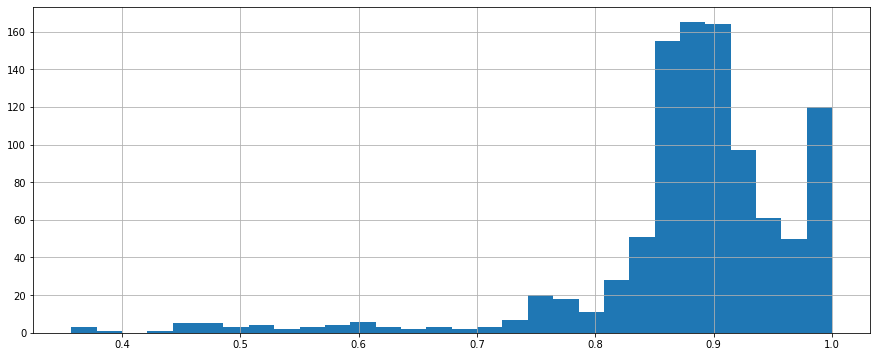

In [53]:
new_df['score'].hist(bins=30, figsize=(15, 6))